<a id='intro'></a>
## Introduction

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

In [74]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

### Data Cleaning
#### Convert the 'release_date' column to datetime
> Parsing the column using the typical parse_dates argument of pd.read_csv or the pd.to_datetime function does not work properly. The reason being that the column contains years in the 1900s, and Python assumes all years are in the 21st century, resulting in incorrectly parsed future years. I will have to correctly identify and fix the problematic years before parsing the column.
* Create a boolean mask to locate problematic years
* Correctly label the dates
* Parse the column to datetime

#### Columns to drop
> I will drop the __budget__ and __revenue__ columns and use their adjusted values instead

> I will drop all columns except for the following, which I will be using for my analysis:
* [__original_title__, __cast__, __director__, __genres__, __production_companies__, __release_date__, __vote_average__, __release_year__, __budget__]

> I will drop all null values

> I will drop rows with zeros in relevant columns I will be analysing
* __vote_average__, __budget__, __revenue__



In [75]:
# Python does not properly parse certain years (ex: 1-1-66 gets parsed as 2066-1-1)
# Include a '19' in front of all years in the 1900's to clearly indicate the century
from datetime import datetime

# Boolean mask for years in the 1900's
incorrect_dates = df['release_year'] < 2000
# Correct the dates
df.loc[incorrect_dates,'release_date'] = df[incorrect_dates]['release_date'].apply(lambda x: x[:-2] + '19' + x[-2:])
# Parse release_date column
df['release_date'] = pd.to_datetime(df['release_date'])

In [76]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [77]:
# Drop budget and revenue column
df.drop(columns=['budget','revenue'], inplace=True)
# Rename budget_adj column to budget
df.rename(columns={'budget_adj':'budget','revenue_adj':'revenue'}, inplace=True)

# List of columns to keep ['original_title','cast','director','genres','production_companies','release_date','vote_average','release_year','budget']
keep_list = ['original_title','cast','director','genres','production_companies','release_date','vote_average','budget','revenue']
# Update DataFrame
df = df[keep_list]

# Change all values of 'nan' to null values, then drop rows with null values
df.replace('nan', np.nan, inplace=True)
df.dropna(subset=['original_title','cast','director','genres','production_companies','release_date'], inplace=True)

# Drop rows with zeros in relevant columns
df = df.loc[df[['vote_average','budget','revenue']].ne(0).all(axis=1)]

# Replace zeros with the mean in relevant columns
'''
df['vote_average'] = df['vote_average'].replace(0, df.vote_average.mean())
df['budget'] = df['budget'].replace(0, df.budget.mean())
df['revenue'] = df['revenue'].replace(0, df.revenue.mean())
'''

df.head()

original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01   

   vote_average        budget       revenue  
0           6.5  1.379999e+08  1.392446e+09  
1           7.1  1.379999e+08  3.481613e+08  
2           6.3  1.012000e+08  2.716190e+08  
3           7.5  1.839999e+08  1.902723e+09  
4           7.3  1.747999e+08  1.385749e+09

In [78]:
df.shape

(3806, 9)

<a id='eda'></a>
## Exploratory Data Analysis

### Which months are the best times to view movies?
#### Description:
> Determine which months have the highest average rating, view the median number of movies released each month, and determine the average budget for movies by their release month.

#### Procedure:
> 
1. Plot the average rating vs. release month
  1. Create a copy of the DataFrame and name it __rating_by_month__
  2. Convert the __release_date__ column to numerical representations of the month
  3. Group by __release_date__, then find the mean of the __vote_average__, and plot the values
2. Plot the median number of movies each month
  1. Create a copy of the DataFrame with the index set to __release_date__ and name it __monthly_count__
  2. Resample the __monthly_count__ DataFrame by month, and count the number of movies that appear each month
  3. Drop the months with zero movies
  4. Reset the index
  5. Convert the __release_date__ column to numerical representations of the month
  6. Group by __release_date__, then find the median number of movies for each month, and plot as a bar chart
3. Plot the average budget vs. release_month
  1. Create a copy of the DataFrame and name it __budget_info__
  2. Convert the __release_date__ column to numerical representations of the month
  3. Group by __release_date__, then find the mean of the __budget__, and plot the values

##### 1. Plot the average rating vs. release month
##### 2. Plot the median number of movies each month
##### 3. Plot the average budget vs. release_month

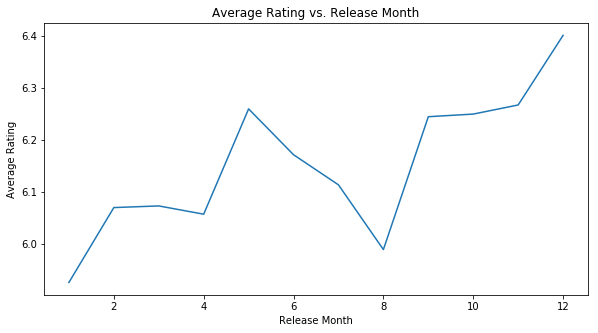

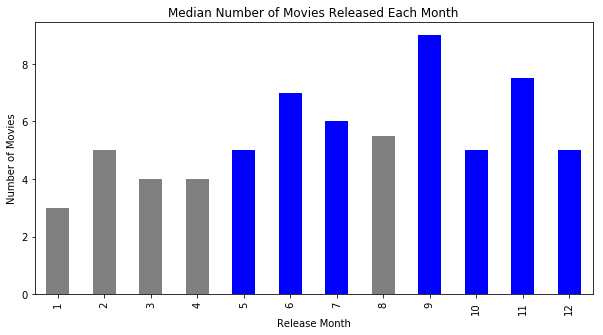

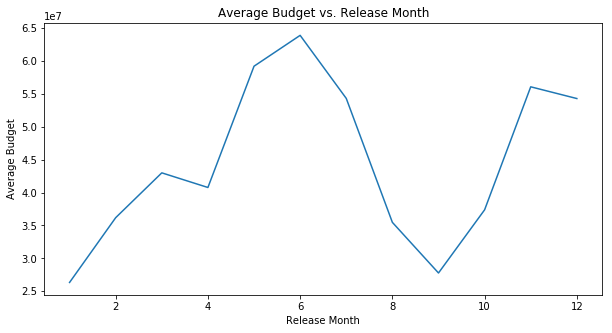

In [79]:
# Plot the average rating vs. release month
plt.figure
rating_by_month = df.copy()
rating_by_month['release_date'] = rating_by_month['release_date'].dt.month
rating_by_month.groupby('release_date')['vote_average'].mean().plot(figsize=(10,5))
plt.subplots_adjust(left = 0.145)
plt.title('Average Rating vs. Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Rating')
plt.show()

# Plot the median number of movies each month
plt.figure
monthly_count = df.set_index('release_date')
monthly_count = monthly_count.resample('M').count()
monthly_count = monthly_count.loc[monthly_count.ne(0).all(axis=1)]
monthly_count = monthly_count.reset_index()
monthly_count['release_date'] = monthly_count['release_date'].dt.month
standout = ['grey','grey','gray','grey','b','b','b','grey','b','b','b','b']
monthly_count.groupby('release_date')['original_title'].median().plot(kind='bar', color=standout, figsize=(10,5))
plt.title('Median Number of Movies Released Each Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.show()

# Plot the average budget vs. release_month
plt.figure
budget_info = df.copy()
budget_info['release_date'] = budget_info['release_date'].dt.month
budget_info.groupby('release_date')['budget'].mean().plot(figsize=(10,5))
plt.title('Average Budget vs. Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Budget');

### Which actors, directors, and production companies produce the best movies by genre?
#### Description:
> I would like to find the top 10 actors/directors/production_companies by genre.

#### Procedure:
> 
1. Preliminary steps:
  1. Write a function to expand each of these columns, as each row contains multiple values
  2. Expand the columns
2. Find the top 10 actors by genre
  1. Group by the __genres__ and __cast__ column, then find the mean of the __vote_average__ column
  2. Take the previous groupby object, groupby the __genres__ colum, then find the top 10 values from the __vote_average__ column
3. Find the top 10 directors by genre
  1. Group by the __genres__ and __director__ column, then find the mean of the __vote_average__ column
  2. Take the previous groupby object, groupby the __genres__ colum, then find the top 10 values from the __vote_average__ 
4. Find the top 10 production companies by genre
  1. Group by the __genres__ and __production_companies__ column, then find the mean of the __vote_average__ column
  2. Take the previous groupby object, groupby the __genres__ colum, then find the top 10 values from the __vote_average__ 

##### 1. Preliminary steps:

In [80]:
# Function to expand columns with multiple values
def expand(df_in, column, sep='|'):
    """
    !!! IMPORTANT !!! : 
        df_in MUST HAVE NO NULL VALUES
    !!! IMPORTANT !!!
    
    Split the values of a column and expand so the new
    DataFrame has one row per value.
    """
    indexes = list()
    new_values = list()
    # Find all rows, and column values to expand
    for i, presplit in enumerate(df_in[column]):
        # Expand the column values and store
        values = presplit.split(sep)
        new_values += values
        # Duplicate the row index and store
        indexes += [i] * len(values)
    # Copy of the original DataFrame with duplicate
     # rows to match expanded column
    df_out = df_in.iloc[indexes, :].copy()
    # Replace the column with the expanded values
    df_out[column] = new_values
    # Renumber the index
    df_out.index = list(range(len(df_out)))
    
    return df_out

In [210]:
# Test to see it can properly expand the columns

# Columns to expand
expand_columns = ['cast','director', 'genres','production_companies']

# Create a new dataframe
test = df.copy()
# Loop through all columns
count = 0
for column in expand_columns:
    test = expand(test,column)
    if not test[column].str.contains("\|").any():
        count += 1
    # Check to see it worked
    # Should print, "Properly expanded!"
    if count == 4:
        print('Properly expanded!')

Properly expanded!


In [225]:
# Expand the genres column, and store in a new DataFrame
expand_genres = expand(df.copy(), 'genres')

# Create a new DataFrame for each attribute and expand the corresponding column
cast_genres = expand(expand_genres, 'cast')
dir_genres = expand(expand_genres, 'director')
prod_genres = expand(expand_genres, 'production_companies')

# Create a list of all the genres
genres_list = sorted(list(expand_genres['genres'].unique()))

##### 2. Find the top 10 actors by genre

In [83]:
# Find the top 10 actors by genre
cast_averages = pd.DataFrame(cast_genres.groupby(['genres', 'cast'])['vote_average'].mean())
find_top_10 = cast_averages['vote_average'].groupby(level=0, group_keys=False)
top_10_cast = pd.DataFrame(find_top_10.nlargest(10)).reset_index()

for genre in genres_list:
    print(top_10_cast.loc[top_10_cast['genres'] == genre])
    print('\n')

   genres                  cast  vote_average
0  Action         Alec Guinness           7.9
1  Action       Anthony Daniels           7.9
2  Action         Peter Cushing           7.9
3  Action         Carrie Fisher           7.8
4  Action         Daniel Henney           7.8
5  Action         Gloria Foster           7.8
6  Action  Kulbhushan Kharbanda           7.8
7  Action          Rajesh Vivek           7.8
8  Action           Ryan Potter           7.8
9  Action           Scott Adsit           7.8


       genres                cast  vote_average
10  Adventure     Anthony Daniels           7.9
11  Adventure  Billy Dee Williams           7.9
12  Adventure       Dave Bautista           7.9
13  Adventure          Ellen Page           7.9
14  Adventure       Peter Cushing           7.9
15  Adventure       Carrie Fisher           7.8
16  Adventure       Daniel Henney           7.8
17  Adventure      Hrithik Roshan           7.8
18  Adventure         Jamie Chung           7.8
19  Adventur

##### 3. Find the top 10 directors by genre

In [84]:
# Find the top 10 directors by genre
dir_averages = pd.DataFrame(dir_genres.groupby(['genres', 'director'])['vote_average'].mean())
find_top_10 = dir_averages['vote_average'].groupby(level=0, group_keys=False)
top_10_dir = pd.DataFrame(find_top_10.nlargest(10)).reset_index()

for genre in genres_list:
    print(top_10_dir.loc[top_10_dir['genres'] == genre])
    print('\n')

   genres            director  vote_average
0  Action  Ashutosh Gowariker           7.8
1  Action      Chris Williams           7.8
2  Action            Don Hall           7.8
3  Action    Richard Marquand           7.8
4  Action   Christopher Nolan           7.7
5  Action        Dean DeBlois           7.7
6  Action         Irwin Allen           7.7
7  Action        Ronald Neame           7.7
8  Action       Anthony Russo           7.6
9  Action      Gavin O'Connor           7.6


       genres            director  vote_average
10  Adventure   Christopher Nolan          7.95
11  Adventure          James Gunn          7.90
12  Adventure  Ashutosh Gowariker          7.80
13  Adventure            Don Hall          7.80
14  Adventure    Richard Marquand          7.80
15  Adventure         Irwin Allen          7.70
16  Adventure        Ronald Neame          7.70
17  Adventure           Sean Penn          7.70
18  Adventure     Stanley Kubrick          7.70
19  Adventure       Anthony Russo 

##### 4. Find the top 10 production companies by genre

In [85]:
# Find the top 10 production companies by genre
prod_averages = pd.DataFrame(prod_genres.groupby(['genres', 'production_companies'])['vote_average'].mean())
find_top_10 = prod_averages['vote_average'].groupby(level=0, group_keys=False)
top_10_prod = pd.DataFrame(find_top_10.nlargest(10)).reset_index()

for genre in genres_list:
    print(top_10_prod.loc[top_10_prod['genres'] == genre])
    print('\n')

   genres                      production_companies  vote_average
0  Action                         Bulletproof Cupid           7.9
1  Action  Ashutosh Gowariker Productions Pvt. Ltd.           7.8
2  Action               Groucho II Film Partnership           7.8
3  Action                   The Saul Zaentz Company           7.8
4  Action                       UTV Motion Pictures           7.8
5  Action             Walt Disney Animation Studios           7.8
6  Action                      3 Arts Entertainment           7.7
7  Action                      Cross Creek Pictures           7.7
8  Action                           Double Negative           7.7
9  Action                          Kent Productions           7.7


       genres                      production_companies  vote_average
10  Adventure                    Lynda Obst Productions           8.0
11  Adventure                         Bulletproof Cupid           7.9
12  Adventure  Ashutosh Gowariker Productions Pvt. Ltd.       

<a id='eda'></a>
## Modeling

### Preprocessing
#### Description:
> Create boolean columns aka *dummy variables* for the **cast**, **director**, **production_companies**, and **genres** columns to fit the data to a linear regression model.

> Transform the **release_date** column into numerical representations of month to include it in the model as well.

#### Procedure:
> 
1. Replace the **cast**, **director**, **and production_companies** columns with dummy variables depending on whether or not the movie has a value in the top 10 feature for the movie's genre. <div class="alert alert-block alert-info"> (E.g. An action movie will have a value of 1 in the cast column if it has an actor in the top 10 list of action movies) </div>
  1. Loop through the features and their corresponding DataFrames
    1. Split the feature column into a list using the .split() method
  2. Loop through the genres
    1. Find all movies in correspondence with the top 10 of the current feature for the current genre
2. Create dummy variables for each genre in the **genres** column
  1. Use pd.get_dummies() to create dummy variables
  2. Drop the original genres column
3. Convert the **release_date**s into months
  1. Use the dt.month method to convert the column into integer values of month

##### 1. Replace the **cast**, **director**, **and production_companies** columns with dummy variables

In [294]:
# List of features
features = ['cast', 'director', 'production_companies']
# List of dataframes
dataframes = [top_10_cast, top_10_dir, top_10_prod]
# Counter to cycle through features and dataframes
count = 0 
# Copy the expand_genres DataFrame
model_df = expand_genres[expand_genres.columns]

# Loop through the features and their corresponding DataFrames
for i in range(3):
    feature = features[i]
    data =  dataframes[i]
    # Split the feature column
    model_df[feature] = model_df[feature].apply(lambda x: x.split('|'))
    
    # Loop through the genres
    for genre in genres_list:
        # Top 10 of the current feature for the current genre
        top_10 = list(data.loc[data['genres'] == genre, feature])

        # Find all movies with a top_10 feature for the current genre
        temp = model_df.loc[model_df.genres == genre, feature].apply(lambda values: any(hit in values for hit in top_10)).astype(int)
        
        # Update the dataframe
        model_df.loc[model_df.genres == genre, feature] = temp

# Check the DataFrame to confirm changes
model_df.head(3)

original_title  cast  director           genres  production_companies  \
0  Jurassic World     0         0           Action                     0   
1  Jurassic World     0         0        Adventure                     0   
2  Jurassic World     0         0  Science Fiction                     0   

  release_date  vote_average        budget       revenue  
0   2015-06-09           6.5  1.379999e+08  1.392446e+09  
1   2015-06-09           6.5  1.379999e+08  1.392446e+09  
2   2015-06-09           6.5  1.379999e+08  1.392446e+09

##### 2. Create dummy variables for each genre in the **genres** column

In [295]:
# Create dummy variables
model_df[genres_list] = pd.get_dummies(model_df['genres'])
# Drop the original 'genres' column
model_df.drop(columns='genres', inplace=True)

# Check the DataFrame to confirm changes
model_df.head(3)

original_title  cast  director  production_companies release_date  \
0  Jurassic World     0         0                     0   2015-06-09   
1  Jurassic World     0         0                     0   2015-06-09   
2  Jurassic World     0         0                     0   2015-06-09   

   vote_average        budget       revenue  Action  Adventure   ...     \
0           6.5  1.379999e+08  1.392446e+09       1          0   ...      
1           6.5  1.379999e+08  1.392446e+09       0          1   ...      
2           6.5  1.379999e+08  1.392446e+09       0          0   ...      

   History  Horror  Music  Mystery  Romance  Science Fiction  TV Movie  \
0        0       0      0        0        0                0         0   
1        0       0      0        0        0                0         0   
2        0       0      0        0        0                1         0   

   Thriller  War  Western  
0         0    0        0  
1         0    0        0  
2         0    0        0  

[3 rows x 28 columns]

##### 3. Convert the **release_date**s into months

In [296]:
# Convert release dates to month
model_df['release_date'] = model_df['release_date'].dt.month

# Check the DataFrame to confirm changes
model_df.head(3)

original_title  cast  director  production_companies  release_date  \
0  Jurassic World     0         0                     0             6   
1  Jurassic World     0         0                     0             6   
2  Jurassic World     0         0                     0             6   

   vote_average        budget       revenue  Action  Adventure   ...     \
0           6.5  1.379999e+08  1.392446e+09       1          0   ...      
1           6.5  1.379999e+08  1.392446e+09       0          1   ...      
2           6.5  1.379999e+08  1.392446e+09       0          0   ...      

   History  Horror  Music  Mystery  Romance  Science Fiction  TV Movie  \
0        0       0      0        0        0                0         0   
1        0       0      0        0        0                0         0   
2        0       0      0        0        0                1         0   

   Thriller  War  Western  
0         0    0        0  
1         0    0        0  
2         0    0        0  

[3 rows x 28 columns]

### Fitting the Linear Regression Model
#### Description:
> Fit the data to a linear regression model using OLS (Ordinary Least Squares)

#### Procedure:
> Using the **cast**, **director**, **production_companies**, **release_date**, **budget**, and the **genres** columns as the features and the **vote_average** column as the target, split the data into training and test sets. Fit the model to the training set, and use the fitted model to predict the average rating.
1. Split the data into training and test sets
  1. Split the DataFrame into two variables, X for the features, and y for the target
  2. Use the train_test_split function to split the data into a training set, and a test set
2. Fit the model to the training set using the OLS class from statsmodels.regression.linear_model
3. Predict the vote_averages of the test set

##### 1. Split the data into training and test sets

In [304]:
# Variable to hold feature data
X = model_df.iloc[:, [x for x in range(1,28) if x != 5 and x!= 7]]
# Variable to hold target data
y = model_df.iloc[:, 5]

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##### 2. Fit the model to the training set

In [317]:
from statsmodels.regression.linear_model import OLS
model = OLS(y_train, X_train)
results = model.fit()

##### 3. Predict the vote_averages of the test set

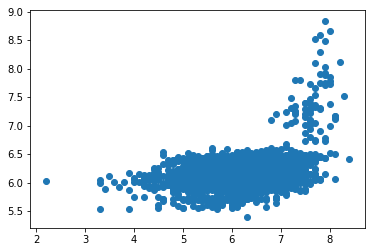

In [318]:
y_pred = results.predict(X_test)
plt.scatter(y_test, y_pred);

In [319]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vote_average   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     55.71
Date:                Tue, 27 Feb 2018   Prob (F-statistic):          1.71e-245
Time:                        01:26:17   Log-Likelihood:                -8435.1
No. Observations:                7638   AIC:                         1.692e+04
Df Residuals:                    7613   BIC:                         1.709e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
cast                     0.7010      0.106      6.615      0.000       0.493       0.909
director                 1.0000      0.070     14.200      0.000       0.862       1.138
production_companies     0.6577      0.097      6.753      0.000       0.467       0.849
release_date             0.0207      0.003      8.206      0.000       0.016       0.026
budget                 9.71e-10   1.88e-10      5.172      0.000    6.03e-10    1.34e-09
Action                   5.7936      0.033    177.023      0.000       5.729       5.858
Adventure                5.8784      0.039    152.235      0.000       5.803       5.954
Animation                5.9815      0.065     92.298      0.000       5.854       6.109
Comedy                   5.8382      0.029    198.312      0.000       5.780       5.896
Crime                    6.0585      0.037    161.624      0.000       5.985       6.132
Documentary              6.1153      0.165     37.001      0.000       5.791       6.439
Drama                    6.1971      0.028    218.926      0.000       6.142       6.253
Family                   5.8685      0.046    126.926      0.000       5.778       5.959
Fantasy                  5.7742      0.048    121.439      0.000       5.681       5.867
Foreign                  4.3566      0.284     15.347      0.000       3.800       4.913
History                  6.2502      0.077     80.812      0.000       6.099       6.402
Horror                   5.5132      0.043    128.831      0.000       5.429       5.597
Music                    5.9702      0.077     77.093      0.000       5.818       6.122
Mystery                  5.9131      0.049    120.530      0.000       5.817       6.009
Romance                  5.9736      0.038    158.752      0.000       5.900       6.047
Science Fiction          5.7448      0.042    135.276      0.000       5.662       5.828
TV Movie                 3.1310      0.738      4.245      0.000       1.685       4.577
Thriller                 5.8392      0.031    190.450      0.000       5.779       5.899
War                      6.1978      0.082     75.507      0.000       6.037       6.359
Western                  5.8782      0.125     47.034      0.000       5.633       6.123
==============================================================================
Omnibus:                      240.223   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.712
Skew:                          -0.415   Prob(JB):                     9.97e-60
Kurtosis:                       3.407   Cond. No.                     6.14e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condit

<a id='conclusions'></a>
## Conclusions

WIP